In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt 

In [2]:
file_path = r'C:\dev\Research\Data Frame\csv-data\merged_data_fix1.csv'
diag_dataset = pd.read_csv(file_path)


In [3]:
print(diag_dataset)

         filename gender  age  Normal/Disorder  heigth_AP  width_AP  \
0     0001-F-037Y      F   37                0       2147      1823   
1     0003-F-013Y      F   13                0       2428      1996   
2     0004-F-010Y      F   10                0       2428      1996   
3     0005-F-025Y      F   25                0       2428      1960   
4     0006-F-031Y      F   31                0       2428      1848   
...           ...    ...  ...              ...        ...       ...   
5303  8635-M-027Y      M   27                0       3036      2268   
5304  8636-M-067Y      M   67                1       3036      2120   
5305  8637-F-032Y      F   32                0       3036      1832   
5306  8642-M-036Y      M   36                0       3036      2316   
5307  8651-F-048Y      F   48                0       3036      2396   

      L1a_1c_AP  L1a_1r_AP  L1a_2c_AP  L1a_2r_AP  ...  L5b_2r_LA  S1a_1c_LA  \
0      876.2222   167.0618   1111.472   168.7665  ...   1474.216   4

In [4]:
diag_dataset.head()

,filename,gender,age,Normal/Disorder,heigth_AP,width_AP,L1a_1c_AP,L1a_1r_AP,L1a_2c_AP,L1a_2r_AP,...,L5b_2r_LA,S1a_1c_LA,S1a_1r_LA,S1a_2c_LA,S1a_2r_LA,L1b_d_LA,L2b_d_LA,L3b_d_LA,L4b_d_LA,L5b_d_LA
0,0001-F-037Y,F,37,0,2147,1823,876.2222,167.0618,1111.472,168.7665,...,1474.216,483.4817,1624.151,681.5828,1508.435,0,0,0,0,0
1,0003-F-013Y,F,13,0,2428,1996,995.1376,915.0048,1188.762,877.8941,...,1126.033,551.5165,1240.550,704.9568,1149.355,0,0,0,0,0
2,0004-F-010Y,F,10,0,2428,1996,1030.5450,262.7610,1235.536,255.3068,...,1141.984,849.9302,1289.932,937.3315,1150.672,0,0,0,0,0
3,0005-F-025Y,F,25,0,2428,1960,1065.6940,352.9687,1266.615,324.4597,...,1265.159,1116.0610,1411.361,1255.0260,1281.082,0,0,0,0,0
4,0006-F-031Y,F,31,0,2428,1848,856.3824,263.6143,1077.760,224.2906,...,1552.956,1148.7650,1672.106,1234.4680,1571.705,0,0,0,0,0


In [5]:
diag_dataset.tail()

,filename,gender,age,Normal/Disorder,heigth_AP,width_AP,L1a_1c_AP,L1a_1r_AP,L1a_2c_AP,L1a_2r_AP,...,L5b_2r_LA,S1a_1c_LA,S1a_1r_LA,S1a_2c_LA,S1a_2r_LA,L1b_d_LA,L2b_d_LA,L3b_d_LA,L4b_d_LA,L5b_d_LA
5303,8635-M-027Y,M,27,0,3036,2268,913.4603,229.3830,1305.719,247.0279,...,1696.374,979.9655,1805.583,1212.9440,1614.832,0,0,0,0,0
5304,8636-M-067Y,M,67,1,3036,2120,768.2296,800.8047,1102.125,814.3777,...,2191.453,1089.1740,2369.099,1316.3280,2146.314,0,4,0,0,3
5305,8637-F-032Y,F,32,0,3036,1832,784.5172,727.5107,1072.264,738.3691,...,1908.791,1215.1500,1959.919,973.1425,2115.008,0,0,0,0,0
5306,8642-M-036Y,M,36,0,3036,2316,1011.1860,647.4302,1335.579,646.0729,...,1654.854,952.6912,1879.818,1228.7840,1726.433,0,0,0,0,0
5307,8651-F-048Y,F,48,0,3036,2396,1020.6870,819.8069,1305.719,810.3058,...,1941.172,1155.5000,2104.783,1334.4490,1976.962,0,0,0,0,0


In [6]:
diag_dataset.shape

(5308, 102)

In [7]:
diag_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5308 entries, 0 to 5307
Columns: 102 entries, filename to L5b_d_LA
dtypes: float64(84), int64(16), object(2)
memory usage: 4.1+ MB


In [8]:
diag_dataset.isnull().sum() #โชว์ทั้งหมด

filename           0
gender             0
age                0
Normal/Disorder    0
heigth_AP          0
                  ..
L1b_d_LA           0
L2b_d_LA           0
L3b_d_LA           0
L4b_d_LA           0
L5b_d_LA           0
Length: 102, dtype: int64

In [9]:
diag_dataset.describe() 

,age,Normal/Disorder,heigth_AP,width_AP,L1a_1c_AP,L1a_1r_AP,L1a_2c_AP,L1a_2r_AP,L1b_1c_AP,L1b_1r_AP,...,L5b_2r_LA,S1a_1c_LA,S1a_1r_LA,S1a_2c_LA,S1a_2r_LA,L1b_d_LA,L2b_d_LA,L3b_d_LA,L4b_d_LA,L5b_d_LA
count,5308.000000,5308.000000,5308.000000,5308.000000,5308.000000,5308.000000,5308.000000,5308.000000,5308.000000,5308.000000,...,5308.000000,5308.000000,5308.000000,5308.000000,5308.000000,5308.000000,5308.000000,5308.000000,5308.000000,5308.000000
mean,53.137905,0.167483,2577.403919,1939.200264,823.637718,481.852898,1104.754659,478.965667,814.922268,633.607085,...,1553.006516,879.915961,1730.718540,1073.907318,1590.394417,0.023926,0.081387,0.134137,0.244537,0.113414
std,18.795705,0.373442,297.013396,380.233980,192.411917,167.538412,210.025495,167.242705,191.805161,172.522109,...,225.883767,274.745206,241.451486,282.627283,229.221504,0.307546,0.560768,0.666360,0.848922,0.589098
min,6.000000,0.000000,1434.000000,860.000000,209.860000,24.233200,465.748700,13.004930,205.179100,180.478500,...,892.051300,126.139100,981.438800,311.156100,928.536000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,2428.000000,1864.000000,749.964400,367.938475,1021.269500,365.739375,740.851200,515.348075,...,1392.248250,688.258225,1554.554000,877.721025,1427.354500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,0.000000,2446.000000,2012.000000,851.733300,464.806150,1122.508500,463.021850,843.103550,614.857700,...,1531.409000,912.465800,1700.543500,1107.810000,1568.519500,0.000000,0.000000,0.000000,0.000000,0.000000
75%,67.000000,0.000000,3018.250000,2012.000000,936.253525,580.677650,1223.043000,578.465900,926.821725,734.998400,...,1695.036250,1062.795000,1881.464250,1259.357000,1733.267000,0.000000,0.000000,0.000000,0.000000,0.000000
max,97.000000,1.000000,3408.000000,3040.000000,1533.061000,1420.014000,1799.768000,1410.811000,1528.703000,1551.616000,...,2571.218000,2246.934000,2797.710000,2397.616000,2618.896000,4.000000,4.000000,4.000000,4.000000,4.000000


In [10]:
# checking the distribution of Target Varibale
diag_dataset['L1b_d_AP'].value_counts()

L1b_d_AP
0    5298
2       6
1       4
Name: count, dtype: int64

In [11]:
diag_dataset['L2b_d_AP'].value_counts()

L2b_d_AP
0    5283
2      13
1      12
Name: count, dtype: int64

In [12]:
diag_dataset['L3b_d_AP'].value_counts()

L3b_d_AP
0    5235
2      43
1      30
Name: count, dtype: int64

In [13]:
diag_dataset['L4b_d_AP'].value_counts()

L4b_d_AP
0    5235
1      40
2      33
Name: count, dtype: int64

In [14]:
diag_dataset['L5b_d_AP'].value_counts()

L5b_d_AP
0    5308
Name: count, dtype: int64

Droping column cause it's irrelavent and doesn't give valuable information.

In [15]:
# Remove unnecessary columns

# Find columns that contain 'LA' in their name
la_columns = [col for col in diag_dataset.columns if 'LA' in col]

# Drop those columns along with the specified ones
diag_dataset = diag_dataset.drop(columns=['filename', 'gender', 'age', 'Normal/Disorder'] + la_columns)


In [16]:
diag_dataset.head()

,heigth_AP,width_AP,L1a_1c_AP,L1a_1r_AP,L1a_2c_AP,L1a_2r_AP,L1b_1c_AP,L1b_1r_AP,L1b_2c_AP,L1b_2r_AP,...,L5a_2r_AP,L5b_1c_AP,L5b_1r_AP,L5b_2c_AP,L5b_2r_AP,L1b_d_AP,L2b_d_AP,L3b_d_AP,L4b_d_AP,L5b_d_AP
0,2147,1823,876.2222,167.0618,1111.472,168.7665,865.9939,313.6671,1119.996,313.6671,...,980.1932,766.5613,1163.9790,1129.421,1157.6960,0,0,0,0,0
1,2428,1996,995.1376,915.0048,1188.762,877.8941,1013.2270,1052.3610,1220.428,1014.4810,...,1628.5880,982.8820,1770.2740,1266.552,1782.8980,0,0,0,0,0
2,2428,1996,1030.5450,262.7610,1235.536,255.3068,1026.2910,375.3837,1235.536,382.0285,...,869.5652,915.9337,951.9692,1168.380,985.3234,0,0,0,0,0
3,2428,1960,1065.6940,352.9687,1266.615,324.4597,1079.2700,488.7259,1274.760,473.7926,...,1043.5540,886.8709,1190.9260,1166.336,1207.6370,0,0,0,0,0
4,2428,1848,856.3824,263.6143,1077.760,224.2906,878.2288,393.2368,1106.889,351.0002,...,926.3470,880.4554,1018.9140,1158.821,1022.5800,0,0,0,0,0


Separating the features(X) and the target(Y)

In [17]:
# ลบคอลัมน์ที่อยู่ใน Y ออกจาก X
X = diag_dataset.drop(columns = ['L1b_d_AP', 'L2b_d_AP', 'L3b_d_AP', 'L4b_d_AP', 'L5b_d_AP'], axis=1)
Y = diag_dataset[['L1b_d_AP', 'L2b_d_AP', 'L3b_d_AP', 'L4b_d_AP', 'L5b_d_AP']]

In [18]:
X.shape

(5308, 42)

In [19]:
X.head()

,heigth_AP,width_AP,L1a_1c_AP,L1a_1r_AP,L1a_2c_AP,L1a_2r_AP,L1b_1c_AP,L1b_1r_AP,L1b_2c_AP,L1b_2r_AP,...,L4b_2c_AP,L4b_2r_AP,L5a_1c_AP,L5a_1r_AP,L5a_2c_AP,L5a_2r_AP,L5b_1c_AP,L5b_1r_AP,L5b_2c_AP,L5b_2r_AP
0,2147,1823,876.2222,167.0618,1111.472,168.7665,865.9939,313.6671,1119.996,313.6671,...,1113.830,957.6473,797.7100,983.0670,1115.284,980.1932,766.5613,1163.9790,1129.421,1157.6960
1,2428,1996,995.1376,915.0048,1188.762,877.8941,1013.2270,1052.3610,1220.428,1014.4810,...,1256.901,1584.5990,1001.1360,1612.9630,1250.212,1628.5880,982.8820,1770.2740,1266.552,1782.8980
2,2428,1996,1030.5450,262.7610,1235.536,255.3068,1026.2910,375.3837,1235.536,382.0285,...,1191.171,893.5715,933.7172,852.6132,1185.042,869.5652,915.9337,951.9692,1168.380,985.3234
3,2428,1960,1065.6940,352.9687,1266.615,324.4597,1079.2700,488.7259,1274.760,473.7926,...,1153.495,1062.3950,919.7288,1035.2790,1157.001,1043.5540,886.8709,1190.9260,1166.336,1207.6370
4,2428,1848,856.3824,263.6143,1077.760,224.2906,878.2288,393.2368,1106.889,351.0002,...,1157.702,912.9492,887.6491,932.5891,1159.975,926.3470,880.4554,1018.9140,1158.821,1022.5800


In [20]:
Y.head()

,L1b_d_AP,L2b_d_AP,L3b_d_AP,L4b_d_AP,L5b_d_AP
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [21]:
print("Unique values in Y:", np.unique(Y))  # ตรวจสอบค่าที่ไม่ซ้ำใน Y

Unique values in Y: [0 1 2]


Feature Scaling<br>
Normalizing the data using MinMaxScaler() class between 0 and 1.

โค้ดนี้ทำการปรับสเกลข้อมูลใน X โดยใช้ MinMaxScaler เพื่อให้ค่าของฟีเจอร์แต่ละคอลัมน์อยู่ในช่วงระหว่าง 0 และ 1 ซึ่งจะช่วยให้โมเดลที่ต้องการทำงานกับข้อมูลที่มีสเกลต่างกันสามารถทำงานได้ดีขึ้น (เช่น โมเดลที่ใช้ระยะห่างระหว่างข้อมูล เช่น KNN หรือ SVM)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaled2 = scaler1.fit_transform(X)
X_norm = pd.DataFrame(scaled2, columns=X.columns)
X_norm.head(10)

,heigth_AP,width_AP,L1a_1c_AP,L1a_1r_AP,L1a_2c_AP,L1a_2r_AP,L1b_1c_AP,L1b_1r_AP,L1b_2c_AP,L1b_2r_AP,...,L4b_2c_AP,L4b_2r_AP,L5a_1c_AP,L5a_1r_AP,L5a_2c_AP,L5a_2r_AP,L5b_1c_AP,L5b_1r_AP,L5b_2c_AP,L5b_2r_AP
0,0.361196,0.441743,0.503599,0.102329,0.484043,0.111433,0.499284,0.097137,0.484204,0.109188,...,0.452184,0.186494,0.450832,0.187720,0.457082,0.181519,0.429534,0.212631,0.456469,0.204485
1,0.503546,0.521101,0.593468,0.638189,0.541981,0.618748,0.610528,0.635883,0.559249,0.614989,...,0.562794,0.612993,0.612526,0.603538,0.561708,0.614670,0.603004,0.588868,0.562224,0.585641
2,0.503546,0.521101,0.620227,0.170892,0.577044,0.173344,0.620398,0.142149,0.570538,0.158527,...,0.511978,0.142904,0.558938,0.101603,0.511174,0.107615,0.549318,0.081068,0.486514,0.099398
3,0.503546,0.504587,0.646791,0.235521,0.600341,0.222817,0.660427,0.224811,0.599847,0.224756,...,0.482850,0.257751,0.547819,0.222187,0.489430,0.223846,0.526012,0.229353,0.484938,0.234932
4,0.503546,0.453211,0.488605,0.171503,0.458772,0.151155,0.508529,0.155169,0.474410,0.136133,...,0.486102,0.156087,0.522320,0.154398,0.491736,0.145548,0.520867,0.122610,0.479142,0.122112
5,0.075988,0.286239,0.355583,0.103494,0.279063,0.107697,0.357993,0.055269,0.277552,0.068405,...,0.266859,0.001535,0.349271,0.011882,0.272305,0.000000,0.355167,0.013518,0.273578,0.000000
6,0.279635,0.366972,0.438508,0.157337,0.445633,0.175404,0.432906,0.158669,0.439547,0.180432,...,0.381618,0.243131,0.363180,0.233950,0.383940,0.242870,0.362550,0.247497,0.377728,0.247032
7,0.503546,0.521101,0.654712,0.161356,0.621834,0.164934,0.645991,0.148028,0.609601,0.175230,...,0.453969,0.224093,0.489936,0.196131,0.443635,0.215900,0.457563,0.214694,0.429863,0.237489
8,0.503546,0.521101,0.489577,0.195340,0.462173,0.171624,0.508423,0.194879,0.483031,0.177570,...,0.477121,0.252564,0.501086,0.237667,0.485303,0.245821,0.492956,0.234027,0.459773,0.240906
9,0.503546,0.521101,0.298494,0.315305,0.294148,0.310342,0.304512,0.313116,0.301230,0.299885,...,0.428052,0.285171,0.447314,0.308433,0.434512,0.290120,0.446638,0.314674,0.443900,0.291811


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt

Finding out which features are most relavent for predicting<br>
breast cancer diagnosis, and reducing the dimensionality of<br>
the data.<br>
- The RandomForestRegressor class creates a regression model based on<br>
multiple dicision trees.<br><br>
- random_state argument of 0 will ensure that the model is reproducible<br>
and consistent.<br><br>
- The zip function pairs each feature name with its corresponding importance<br>
value.<br><br>
- The RFECV class performs recursive feature elimination with cross-validation.<br>
Validation strategy is 5-fold-cross-validation(cv=5) and the evaluation metric<br>
is negatice mean squared error(scoring="neg_mean_squared_error").<br><br>
- rfe.get_support() returns a boolean array indicating which features are selected<br>
by rfe.

ขั้นแรก โมเดล RandomForestRegressor ใช้ในการคำนวณความสำคัญของแต่ละฟีเจอร์ (feature importance) และแสดงผลในรูปกราฟแท่งเพื่อดูว่าฟีเจอร์ใดสำคัญที่สุดสำหรับการทำนาย

ขั้นที่สอง ใช้ RFECV เพื่อทำการเลือกฟีเจอร์ที่สำคัญที่สุดด้วยวิธี Recursive Feature Elimination พร้อมกับการตรวจสอบค่าความผิดพลาดโดยใช้ Cross-Validation และแสดงผลฟีเจอร์ที่ถูกเลือก

In [ ]:
# ฟีเจอร์ทั้งหมด
features = X_norm.columns

# สร้างและฝึกโมเดล Random Forest Regressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_norm, Y)

# คำนวณ Feature Importance
f_i = list(zip(features, rf.feature_importances_))
f_i.sort(key=lambda x: x[1])  # เรียงตามความสำคัญจากน้อยไปมาก

# แสดง Feature Importance ด้วยกราฟ
plt.barh([x[0] for x in f_i], [x[1] for x in f_i])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.show()

# ทำ Cross-Validation เพื่อประเมินโมเดล
scores = cross_val_score(rf, X_norm, Y, cv=5, scoring="neg_mean_squared_error")
mse_scores = -scores  # แปลง Negative MSE กลับเป็นค่าปกติ
print("Cross-Validation Mean Squared Error (MSE):", mse_scores)
print("Mean MSE:", mse_scores.mean())
print("Standard Deviation of MSE:", mse_scores.std())

In [26]:
X_selected = X_norm

In [27]:
X_selected.shape

(5308, 42)

Splitting the data into training data & Testing data<br>
- test_size=0.2 means that 20% of the data is for test set<br>
and 80% is for train set.<br><br>
- random_state=2 means that it uses 2 as the seed for the random<br>
number generator to ensure reproducibility.<br>

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=2)

In [29]:
print(X_selected.shape, X_train.shape, Y_train.shape, X_test.shape)

(5308, 42) (4246, 42) (4246, 5) (1062, 42)


In [30]:
print(Y_train.shape)


(4246, 5)


In [31]:
print(Y_train[:5])


      L1b_d_AP  L2b_d_AP  L3b_d_AP  L4b_d_AP  L5b_d_AP
3186         0         0         0         0         0
4323         0         0         2         0         0
4877         0         0         0         0         0
1471         0         0         0         0         0
221          0         0         0         0         0


**Building the Neural Network**

In [32]:
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Input
from keras.optimizers import Adam




In [33]:
# สร้างโมเดล MLP
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')  # เปลี่ยนเป็น 5 หน่วย เพื่อให้ตรงกับ 5 คลาส
])

In [34]:
# คอมไพล์โมเดล
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
# Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

In [36]:
# ฝึกโมเดล
history = model.fit(X_train, Y_train, 
                    epochs=200, 
                    batch_size=32, 
                    validation_split=0.2
                    )

Epoch 1/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3166 - loss: 0.0959 - val_accuracy: 0.0000e+00 - val_loss: 0.0941
Epoch 2/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.1252 - val_accuracy: 0.0000e+00 - val_loss: 0.0997
Epoch 3/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.1106 - val_accuracy: 0.0000e+00 - val_loss: 0.1023
Epoch 4/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0048 - loss: 0.1034 - val_accuracy: 0.0000e+00 - val_loss: 0.0936
Epoch 5/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0340 - loss: 0.0979 - val_accuracy: 0.3953 - val_loss: 0.1057
Epoch 6/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0857 - loss: 0.1231 - val_accuracy: 0.0000e+00 - val_loss: 0.2252
Epoch 7/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0857 - loss: 0.1489 - val_accuracy: 0.0153 - val_loss: 0.1696
Epoch 8/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.18

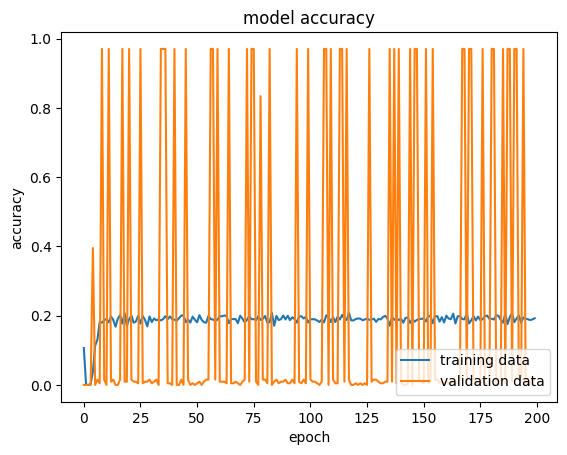

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

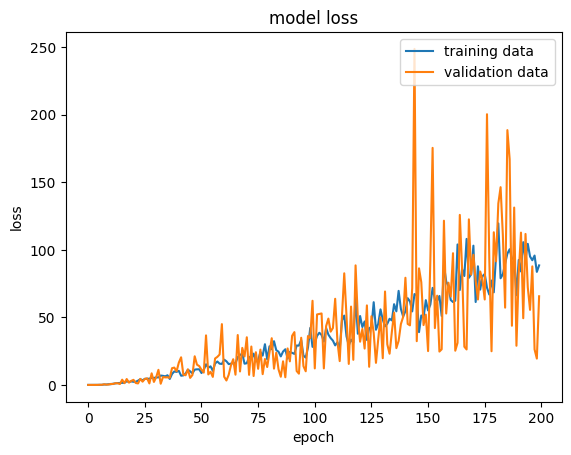

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [39]:
loss, accuracy = model.evaluate(X_test , Y_test)
print(accuracy)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0159 - loss: 54.8239    
0.009416195563971996


In [40]:
Y_pred = model.predict(X_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [41]:
print(Y_pred.shape)

(1062, 5)


In [42]:
print(Y_pred)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


In [43]:
# converting the prediction probability to class labels
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3)

In [44]:
Y_pred_labels[0:10]

[np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3)]

In [45]:
Y_test.head(10)

,L1b_d_AP,L2b_d_AP,L3b_d_AP,L4b_d_AP,L5b_d_AP
3828,0,0,0,0,0
587,0,0,0,0,0
1153,0,0,0,0,0
2821,0,0,0,0,0
4484,0,0,0,0,0
828,0,0,0,0,0
3524,0,0,0,0,0
3188,0,0,0,0,0
1459,0,0,0,0,0
1247,0,0,0,0,0


In [46]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)